# Preparação de Dados

## Carregar o dataset

O código na célula abaixo importa os pacotes necessários para executar este notebook.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

%matplotlib inline

O código na célula abaixo carrega o dataset e imprime as primeiras linhas do data frame.

In [2]:
enem = pd.read_csv("../data/projeto_ENEM.csv")
enem.head(20)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,170005778262,2017,2108900,Poção de Pedras,21,MA,20.0,M,0.0,3,...,A,A,A,A,A,A,A,A,A,A
1,170003822638,2017,2604007,Carpina,26,PE,17.0,M,0.0,1,...,A,B,B,A,B,A,A,B,B,A
2,170005713640,2017,2512762,Riachão do Poço,25,PB,17.0,F,0.0,3,...,A,B,A,A,D,A,A,B,B,A
3,170000323750,2017,4106902,Curitiba,41,PR,22.0,M,0.0,1,...,A,B,B,B,C,B,B,B,A,A
4,170000783745,2017,3303906,Petrópolis,33,RJ,18.0,F,0.0,1,...,A,E,B,A,E,A,B,A,B,C
5,170006358870,2017,3127701,Governador Valadares,31,MG,20.0,M,0.0,1,...,A,B,A,A,C,A,B,B,A,A
6,170004741887,2017,2111300,São Luís,21,MA,33.0,M,1.0,2,...,A,B,B,B,C,A,A,A,A,D
7,170001700000,2017,2704302,Maceió,27,AL,19.0,F,0.0,3,...,A,B,B,A,E,A,B,B,B,A
8,170002488104,2017,3530102,Mirandópolis,35,SP,17.0,M,0.0,1,...,B,B,A,A,C,B,B,B,B,B
9,170003144253,2017,1400100,Boa Vista,14,RR,17.0,F,0.0,3,...,A,B,A,A,C,A,A,A,C,A


## Tratamento dos valores ausentes

Existem 5767 linhas com município de nascimento ausente. Esse dado está relacionado com outros dados municipais como município de residência e município da aplicação da prova, que pela contemporaneidade devem servir melhor para predizer o desempenho do candidato. Portanto, decidimos eliminar as colunas relativas a esse dado.

Existem 121 mil linhas com dados da escola ausente, mas não podemos simplesmente eliminar essas colunas, tendo em vista que a escola é muito importante para predizer o desempenho do candidato. Desse registro, vamos manter somente a chave do registro, a coluna `CO_ESCOLA`, imputando-lhe o valor $0$ quando estiver ausente. Na seção sobre engenharia de features abaixo, mostraremos como iremos usar essa coluna para encontrar outras features mais úteis.

Existem 6 linhas com `NU_IDADE` ausente e 5631 linhas com `TP_ESTADO_CIVIL` ausente. Como esses dados têm alguma importância no desempenho do candidato e são poucas em relação ao total, decidimos eliminar todas as linhas que têm esses dados ausentes.

O código na célula abaixo faz as transformações descritas.

In [3]:
enem.drop(
    [
        "CO_MUNICIPIO_NASCIMENTO",
        "NO_MUNICIPIO_NASCIMENTO",
        "CO_UF_NASCIMENTO",
        "SG_UF_NASCIMENTO",
        "TP_ENSINO",
        "CO_MUNICIPIO_ESC",
        "NO_MUNICIPIO_ESC",
        "CO_UF_ESC",
        "SG_UF_ESC",
        "TP_DEPENDENCIA_ADM_ESC",
        "TP_LOCALIZACAO_ESC",
        "TP_SIT_FUNC_ESC",
    ],
    axis=1,
    inplace=True,
)
enem.loc[enem["CO_ESCOLA"].isna(), "CO_ESCOLA"] = 0
enem = enem[enem["NU_IDADE"].notna() & enem["TP_ESTADO_CIVIL"].notna()]
enem.shape

(171253, 101)

### Transformar o tipo de dados das colunas

Existem três colunas nesse dataset que não têm o tipo correto como resultado dos valores ausentes.

O código na célula abaixo itera sobre a lista de colunas os definindo como inteiros.

In [4]:
cols = ["NU_IDADE", "TP_ESTADO_CIVIL", "CO_ESCOLA"]
for col in cols:
    enem[col] = pd.to_numeric(enem[col], downcast="integer")
enem[cols].dtypes

NU_IDADE            int8
TP_ESTADO_CIVIL     int8
CO_ESCOLA          int32
dtype: object

O código a seguir cria as colunas dos labels, $0$ para o candidato *reprovado* na prova, que tirou nota menor do que 650, e $1$ para o candidato *aprovado* na prova, que tirou nota 650 ou mais. Também elimina as colunas com as notas numéricas.

In [5]:
provas = ["CN", "CH", "LC", "MT"]
for prova in provas:
    nu_nota_prova = "NU_NOTA_" + prova
    enem["LB_APROVADO_" + prova] = np.where(enem[nu_nota_prova] < 650, 0, 1)
    enem.drop([nu_nota_prova], axis=1, inplace=True)
enem.head(20)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q022,Q023,Q024,Q025,Q026,Q027,LB_APROVADO_CN,LB_APROVADO_CH,LB_APROVADO_LC,LB_APROVADO_MT
0,170005778262,2017,2108900,Poção de Pedras,21,MA,20,M,0,3,...,A,A,A,A,A,A,0,0,0,0
1,170003822638,2017,2604007,Carpina,26,PE,17,M,0,1,...,B,A,A,B,B,A,0,0,0,0
2,170005713640,2017,2512762,Riachão do Poço,25,PB,17,F,0,3,...,D,A,A,B,B,A,0,0,0,0
3,170000323750,2017,4106902,Curitiba,41,PR,22,M,0,1,...,C,B,B,B,A,A,0,0,0,0
4,170000783745,2017,3303906,Petrópolis,33,RJ,18,F,0,1,...,E,A,B,A,B,C,0,0,0,0
5,170006358870,2017,3127701,Governador Valadares,31,MG,20,M,0,1,...,C,A,B,B,A,A,0,0,0,0
6,170004741887,2017,2111300,São Luís,21,MA,33,M,1,2,...,C,A,A,A,A,D,0,0,0,1
7,170001700000,2017,2704302,Maceió,27,AL,19,F,0,3,...,E,A,B,B,B,A,0,0,0,0
8,170002488104,2017,3530102,Mirandópolis,35,SP,17,M,0,1,...,C,B,B,B,B,B,0,0,0,0
9,170003144253,2017,1400100,Boa Vista,14,RR,17,F,0,3,...,C,A,A,A,C,A,0,0,0,0


### Engenharia de Features
#### Agregando a idade
O código abaixo calcula, para cada idade, quantos candidatos estão inscritos e proporção de aprovados em cada prova e grava tudo no arquivo &ldquo;data/idades.csv&rdquo;.

In [7]:
idades = enem.groupby(by="NU_IDADE", as_index=False).agg(
    {
        "NU_INSCRICAO": np.size,
        "LB_APROVADO_CN": np.sum,
        "LB_APROVADO_CH": np.sum,
        "LB_APROVADO_LC": np.sum,
        "LB_APROVADO_MT": np.sum,
    }
)
for prova in provas:
    idades["PC_APROVACAO_" + prova] = (
        idades["LB_APROVADO_" + prova] / idades["NU_INSCRICAO"]
    )
idades.to_csv("../data/idades.csv", index=False)
idades.head(20)

,NU_IDADE,NU_INSCRICAO,LB_APROVADO_CN,LB_APROVADO_CH,LB_APROVADO_LC,LB_APROVADO_MT,PC_APROVACAO_CN,PC_APROVACAO_CH,PC_APROVACAO_LC,PC_APROVACAO_MT
0,12,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,13,11,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,14,210,1,1,0,15,0.004762,0.004762,0.000000,0.071429
3,15,2565,39,68,13,402,0.015205,0.026511,0.005068,0.156725
4,16,10910,288,525,76,1930,0.026398,0.048121,0.006966,0.176902
5,17,32542,1144,1821,292,4840,0.035155,0.055958,0.008973,0.148731
6,18,30226,1213,1686,279,4187,0.040131,0.055780,0.009230,0.138523
7,19,19154,797,1102,158,2416,0.041610,0.057534,0.008249,0.126136
8,20,14206,613,738,111,1646,0.043151,0.051950,0.007814,0.115867
9,21,9970,325,446,72,1067,0.032598,0.044734,0.007222,0.107021


Podemos ver que a taxa de aprovação aumenta na faixa dos 15 à 20 anos, onde também estão a grande maioria dos candidatos, e decresce para os extremos. Portanto não é conveniente usar a idade diretamente para treinar o modelo, será melhor a transformar em um feature categórico dividindo em 25 faixas etárias:

| Faixa Etária |
|--------------|
| < 15 anos    |
| 15 anos      |
| 16 anos |
| 17 anos |
| 18 anos |
| 19 anos |
| 20 anos |
| 21 anos |
| 22 anos |
| 23 anos |
| 24 anos |
| 25 anos |
| 26 anos |
| 27 anos |
| 28 anos |
| 29 anos |
| 30 anos |
| 31&ndash;32 anos |
| 33&ndash;34 anos |
| 35&ndash;36 anos |
| 37&ndash;38 anos |
| 39&ndash;41 anos |
| 42&ndash;45 anos |
| 46&ndash;50 anos |
| >50 anos |

In [ ]:
criteria = [
    enem["NU_IDADE"] < 15,
    enem["NU_IDADE"] == 15,
    enem["NU_IDADE"] == 16,
    enem["NU_IDADE"] == 17,
    enem["NU_IDADE"] == 18,
    enem["NU_IDADE"] == 19,
    enem["NU_IDADE"] == 20,
    enem["NU_IDADE"] == 21,
    enem["NU_IDADE"] == 22,
    enem["NU_IDADE"] == 23,
    enem["NU_IDADE"] == 24,
    enem["NU_IDADE"] == 25,
    enem["NU_IDADE"] == 26,
    enem["NU_IDADE"] == 27,
    enem["NU_IDADE"] == 28,
    enem["NU_IDADE"] == 29,
    enem["NU_IDADE"] == 30,
    enem["NU_IDADE"].between(31,32),
    enem["NU_IDADE"].between(33,34),
    enem["NU_IDADE"].between(35,36),
    enem["NU_IDADE"].between(37,38),
    enem["NU_IDADE"].between(39,41),
    enem["NU_IDADE"].between(42,45),
    enem["NU_IDADE"].between(46,50),
    enem["NU_IDADE"] > 50,
]



Notamos a existência de dois dados que são importantes para predizer o desempenho do estudante: o município de residência e a escola do candidato, porém, como existem milhares de municípios e escolas, não podemos usar esses dados crus para treinar os modelos, devemos encontrar um atributo do município e um atributo da escola que tenham poder preditivo.

Para cada municipio e escola, calculamos a proporção de candidatos que pontuaram com 650 pontos ou mais em cada prova e utilizaremos estes dados como features no treinamento dos modelos.

A partir do arquivo inteiro de microdados do Enem, geramos dois conjuntos de dados: um para os municípios, `dados/municipios.csv`, e outro para as escolas, `dados/escolas.csv`. Como o número de registro dos microdados do Enem é grande demais para ser tratado da maneira tradicional usando Pandas, tivemos que desenvolver um programa específico, cujo o código Python está no arquivo `read_microdados.py`. Em particular, o programa tem tempo de execução $O(n)$ e uso de memória $O(e + m)$ onde $n$ é o número de registros de microdados do Enem, $e$ é o número de escolas e $m$ o número de municípios.

O código abaixo carrega os conjuntos de dados gerados pelo programa.

#### Aggregating categorical variables

When a dataset contains categorical variables these need to be investigated to ensure that each category has sufficient samples. It is commonly the case that some categories may have very few samples, or have so many similar categories as to be meaningless. 

As a specific case, you will examine the number of cylinders in the cars. Execute the code in the cell below to print a frequency table for this variable and examine the result. 

In [13]:
auto_prices['num_of_cylinders'].value_counts()

four      155
six        24
five       10
eight       4
twelve      1
three       1
Name: num_of_cylinders, dtype: int64

Notice that there is only one car with three and twelve cylinders. There are only four cars with eight cylinders, and 10 cars with five cylinders. It is likely that all of these categories will not have statistically significant difference in predicting auto price. It is clear that these categories need to be aggregated. 

The code in the cell below uses a Python dictionary to recode the number of cylinder categories into a smaller number categories. Execute this code and examine the resulting frequency table.

In [14]:
cylinder_categories = {'three':'three_four', 'four':'three_four', 
                    'five':'five_six', 'six':'five_six',
                    'eight':'eight_twelve', 'twelve':'eight_twelve'}
auto_prices['num_of_cylinders'] = [cylinder_categories[x]
                                   for x in auto_prices['num_of_cylinders']]
auto_prices['num_of_cylinders'].value_counts()

three_four      156
five_six         34
eight_twelve      5
Name: num_of_cylinders, dtype: int64

There are now three categories. One of these categories only has five members. However, it is likely that these autos will have different pricing from others.

Next, execute the code in the cell below to make box plots of the new cylinder categories.

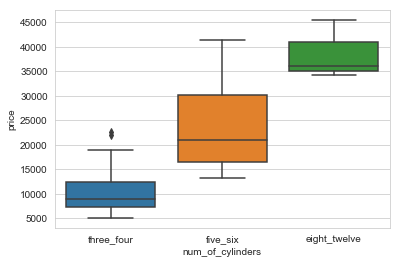

In [15]:
def plot_box(auto_prices, col, col_y = 'price'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=auto_prices)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(auto_prices, 'num_of_cylinders')    

Indeed, the price range of these categories is distinctive. It is likely that these new categories will be useful in predicting the price of autos. 

Now, execute the code in the cell below and examine the frequency table for the `body_style` feature.

In [16]:
auto_prices['body_style'].value_counts()

sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

Two of these categories have a limited number of cases. These categories can be aggregated to increase the number of cases using a similar approach as used for the number of cylinders. Execute the code in the cell below to aggregate these categories.

In [17]:
body_cats = {'sedan':'sedan', 'hatchback':'hatchback', 'wagon':'wagon', 
             'hardtop':'hardtop_convert', 'convertible':'hardtop_convert'}
auto_prices['body_style'] = [body_cats[x] for x in auto_prices['body_style']]
auto_prices['body_style'].value_counts()

sedan              94
hatchback          63
wagon              24
hardtop_convert    14
Name: body_style, dtype: int64

To investigate if this aggregation of categories was a good idea, execute the code in the cell below to display a box plot. 

Then, answer **Question 1** on the course page.

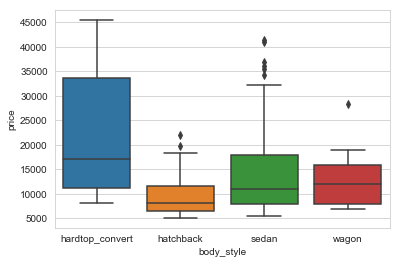

In [18]:
def plot_box(auto_prices, col, col_y = 'price'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=auto_prices)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(auto_prices, 'body_style')    

The `hardtop_convert` category does appear to have values distinct from the other body style. 

#### Transforming numeric variables

To improve performance of machine learning models transformations of the values are often applied. Typically, transformations are used to make the relationships between variables more linear. In other cases, transformations are performed to make distributions closer to Normal, or at least more symmetric. These transformations can include taking logarithms, exponential transformations and power transformations. 

In this case, you will transform the label, the price of the car. Execute the code in the cell below to display and examine a histogram of the label. 

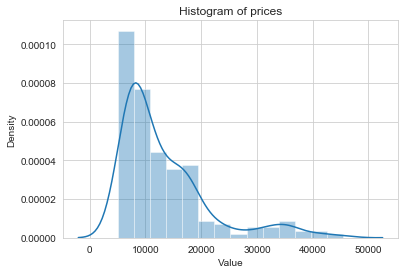

In [19]:
def hist_plot(values, lab):
    ## Distribution plot of values
    sns.distplot(values)
    plt.title(f'Histogram of {lab}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(auto_prices['price'], 'prices')

The distribution of auto price is both quite skewed to the left and multimodal. Given the skew and the fact that there are no values less than or equal to zero, a log transformation might be appropriate.

The code in the cell below displays a histogram of the logarithm of prices. Execute this code and examine the result.

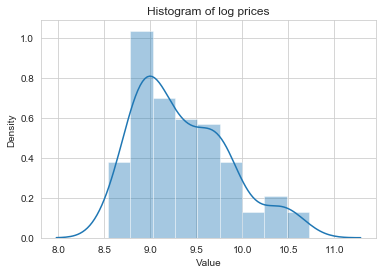

In [20]:
auto_prices['log_price'] = np.log(auto_prices['price'])
hist_plot(auto_prices['log_price'], 'log prices')

The distribution of the logarithm of price is more symmetric, but still shows some multimodal tendency and skew. Nonetheless, this is an improvement so we will use these values as our label.

The next question is, how does this transformation change the relationship between the label and some of the features? To find out, execute the code in the cell below. 

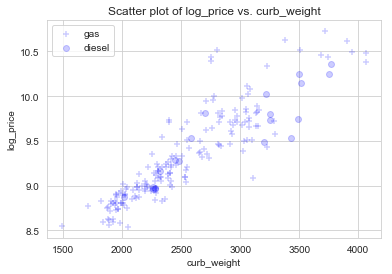

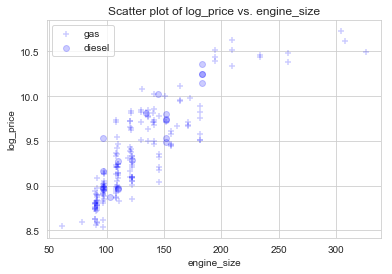

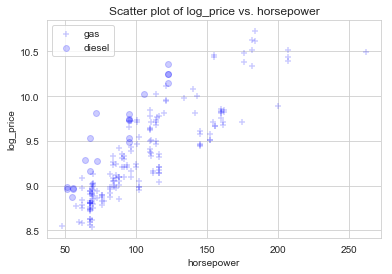

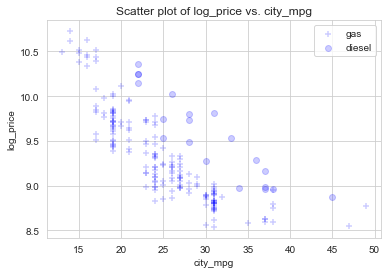

In [21]:
def plot_scatter_shape(auto_prices, cols, shape_col = 'fuel_type', col_y = 'log_price', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = auto_prices[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = auto_prices[auto_prices[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter_shape(auto_prices, num_cols)   

Comparing the results to those obtained in the visualization lab, it does appear that the relationships between curb_weight and log_price and city_mpg and log_price are more linear, compared to the relationships between curb_weight and price and city_mpg and price respectively.

The relationship with the log_price and categorical variables should likely also be investigated. It is also possible that some type of power transformation should be applied to, say horsepower or engine_size. In the interest of brevity, these ideas are not pursued here. 

Before proceeding, answer **Question 2** on the course page.

In [ ]:
# Let's save the dataframe to a csv file 
# We will use this in the next module
# so that we don't have to re-do the steps above
# You don't have to run this code 
# as the csv file has been saved under the next module's folder
auto_prices.to_csv('Auto_Data_Preped.csv', index = False, header = True)

## Another example

Next, you will prepare the German credit data. Execute the code in the cell below  to load the dataset and print the head (first 5 rows) of the dataframe.

In [2]:
credit = pd.read_csv('German_Credit.csv', header=None)
credit.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1122334,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,6156361,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,2051359,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,8740590,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,3924540,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,2


This dataset is a bit hard to understand. For a start, the column names are not human readable. 

### Recode character strings 

You have likely noticed that the the column names are  not human readable. This can be changed as was done for the previous dataset. Execute the code in the cell below to add human-readable column names to the data frame. 

In [3]:
credit.columns = ['customer_id', 'checking_account_status', 
                  'loan_duration_mo', 'credit_history', 
                  'purpose', 'loan_amount', 'savings_account_balance', 
                  'time_employed_yrs', 'payment_pcnt_income','gender_status', 
                  'other_signators', 'time_in_residence', 'property', 
                  'age_yrs',
                  'other_credit_outstanding', 'home_ownership', 
                  'number_loans', 
                  'job_category', 'dependents', 'telephone', 'foreign_worker', 
                  'bad_credit']
credit.head()

,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,6156361,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,2051359,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,8740590,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,3924540,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Next, there is a trickier problem to deal with. The current coding of the categorical variables is impossible to understand. This makes interpreting these variables nearly impossible.  

The code in the cell below uses a list of dictionaries to recode the categorical features with human-readable text. The final dictionary in the list recodes good and bad credit as a binary variable, $\{ 0,1 \}$. Two iterators are used to apply the dictionary:
1. The `for` loop iterates over the columns and indexes the dictionary for the column. 
2. A list comprehension iterates of the values in the column and uses the dictionary to map the codes to human-readable category names. 

Execute this code and examine the result: 

In [4]:
code_list = [['checking_account_status', 
              {'A11' : '< 0 DM', 
               'A12' : '0 - 200 DM', 
               'A13' : '> 200 DM or salary assignment', 
               'A14' : 'none'}],
            ['credit_history',
            {'A30' : 'no credit - paid', 
             'A31' : 'all loans at bank paid', 
             'A32' : 'current loans paid', 
             'A33' : 'past payment delays', 
             'A34' : 'critical account - other non-bank loans'}],
            ['purpose',
            {'A40' : 'car (new)', 
             'A41' : 'car (used)',
             'A42' : 'furniture/equipment',
             'A43' : 'radio/television', 
             'A44' : 'domestic appliances', 
             'A45' : 'repairs', 
             'A46' : 'education', 
             'A47' : 'vacation',
             'A48' : 'retraining',
             'A49' : 'business', 
             'A410' : 'other' }],
            ['savings_account_balance',
            {'A61' : '< 100 DM', 
             'A62' : '100 - 500 DM', 
             'A63' : '500 - 1000 DM', 
             'A64' : '>= 1000 DM',
             'A65' : 'unknown/none' }],
            ['time_employed_yrs',
            {'A71' : 'unemployed',
             'A72' : '< 1 year', 
             'A73' : '1 - 4 years', 
             'A74' : '4 - 7 years', 
             'A75' : '>= 7 years'}],
            ['gender_status',
            {'A91' : 'male-divorced/separated', 
             'A92' : 'female-divorced/separated/married',
             'A93' : 'male-single', 
             'A94' : 'male-married/widowed', 
             'A95' : 'female-single'}],
            ['other_signators',
            {'A101' : 'none', 
             'A102' : 'co-applicant', 
             'A103' : 'guarantor'}],
            ['property',
            {'A121' : 'real estate',
             'A122' : 'building society savings/life insurance', 
             'A123' : 'car or other',
             'A124' : 'unknown-none' }],
            ['other_credit_outstanding',
            {'A141' : 'bank', 
             'A142' : 'stores', 
             'A143' : 'none'}],
             ['home_ownership',
            {'A151' : 'rent', 
             'A152' : 'own', 
             'A153' : 'for free'}],
            ['job_category',
            {'A171' : 'unemployed-unskilled-non-resident', 
             'A172' : 'unskilled-resident', 
             'A173' : 'skilled',
             'A174' : 'highly skilled'}],
            ['telephone', 
            {'A191' : 'none', 
             'A192' : 'yes'}],
            ['foreign_worker',
            {'A201' : 'yes', 
             'A202' : 'no'}],
            ['bad_credit',
            {2 : 1,
             1 : 0}]]

for col_dic in code_list:
    col = col_dic[0]
    dic = col_dic[1]
    credit[col] = [dic[x] for x in credit[col]]
    
credit.head()    

,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,real estate,67,none,own,2,skilled,1,yes,yes,0
1,6156361,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,...,real estate,22,none,own,1,skilled,1,none,yes,1
2,2051359,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,0
3,8740590,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,0
4,3924540,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,...,unknown-none,53,none,for free,2,skilled,2,none,yes,1


The categorical values are now coded in a human readable manner. 

### Remove duplicate rows

Duplicate cases can seriously bias the training of machine learning models. In simple terms, cases which are duplicates add undue weight to that case when training a machine learning model. Therefore, it is necessary to ensure there are no duplicates in the dataset before training a model.  

One must be careful when determining if a case is a duplicate or not. It is possible that some cases have identical values, particularly if most or all features are categorical. On the other hand, if there are columns with values guaranteed to be unique these can be used to detect and remove duplicates.

Another consideration when removing duplicate cases is determining which case to remove. If the duplicates have different dates of creation, the newest date is often selected. In the absence of such a criteria, the choice is often arbitrary. You may chose to keep the first case or the last case. 

The German credit data has a customer_id column which should be unique. In the previous lab, we simply remove the customer_id. Turns out, this identifier column will be useful to determine duplicate rows. The presence of duplicates can be determined by comparing the number of rows to the number of unique values of the identifier column, in this case the customer_id column. The code in the cell below prints the shape of the data frame and the number of unique customer_id values. 

Execute this code, examine the results, and answer **Question 3** on the course page. 

In [7]:
print(credit.shape)
print(credit['customer_id'].unique().shape)

(1012, 22)
(1000,)


There are 12 duplicate cases. These need to be located and the duplicates removed. In this case, the first instance will be kept. 

The code in the cell below removes these duplicates from the data frame inplace and the number of remaining rows and unique customer_ids are printed. Execute this code and examine the results. 

In [8]:
credit.drop_duplicates(subset = 'customer_id', keep = 'first', inplace = True)
print(credit.shape)
print(credit['customer_id'].unique().shape)

(1000, 22)
(1000,)


The duplicate rows have been successfully removed. 

In [ ]:
# Let's save the dataframe to a csv file 
# We will use this in the next module 
# so that we don't have to re-do the steps above
# You don't have to run this code 
# as the csv file has been saved under the next module's folder
credit.to_csv('German_Credit_Preped.csv', index = False, header = True)

### Feature engineering

Some feature engineering needs to be investigated to determine if any improvement in predictive power can be expected. From the previous data exploration, it is apparent that several of the numeric features had a strong left skew. A log transformation may help in a case like this. 

Execute the code in the cell below uses the Pandas `applymap` method to apply the `log` function to each element of several columns in the data frame. Execute this code.

In [9]:
credit[['log_loan_duration_mo', 'log_loan_amount', 'log_age_yrs']] = (
    credit[['loan_duration_mo', 'loan_amount', 'age_yrs']]
        .applymap(math.log)
)

Next, execute the code in the cell below to visualize the differences in the distributions of the untransformed and transformed variables for the two label values. 

log_loan_duration_mo
log_loan_amount
log_age_yrs
loan_duration_mo
loan_amount
age_yrs


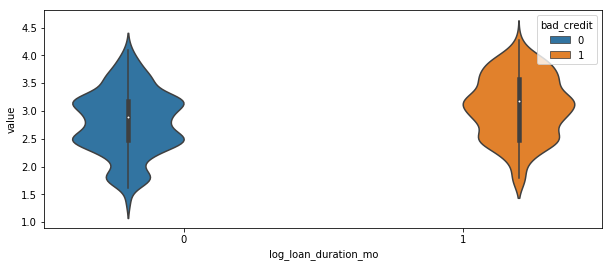

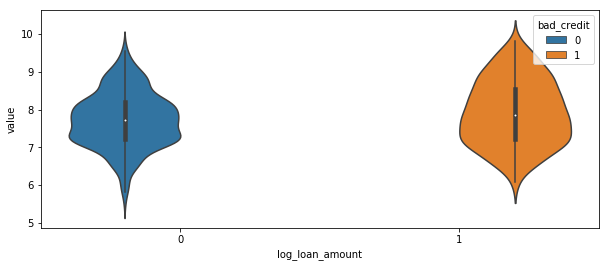

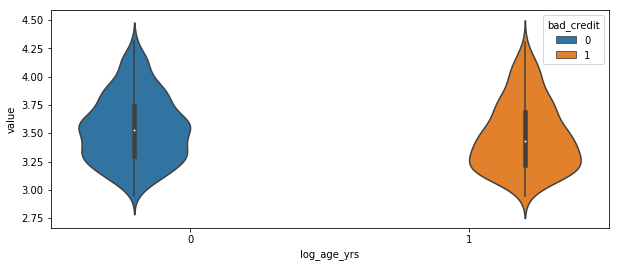

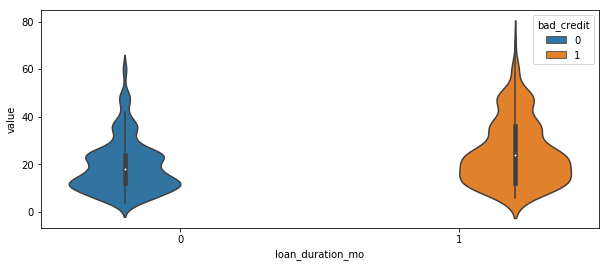

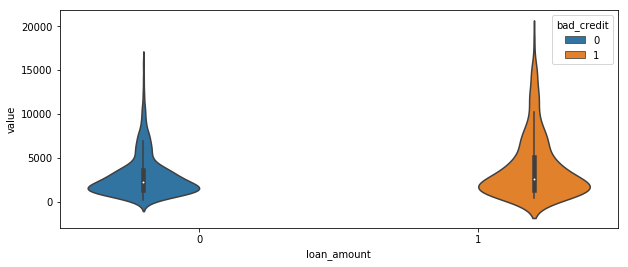

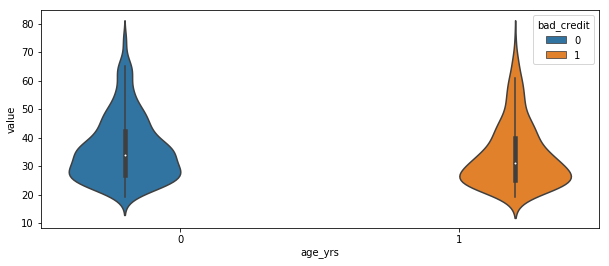

In [10]:
num_cols = ['log_loan_duration_mo', 'log_loan_amount', 'log_age_yrs',
                   'loan_duration_mo', 'loan_amount', 'age_yrs']

for col in num_cols:
    print(col)
    plt.figure(figsize = (10,4))
    sns.violinplot(x= 'bad_credit', y = col, hue = 'bad_credit', 
                   data = credit)
    plt.ylabel('value')
    plt.xlabel(col)
    plt.show()

The log transformed features have more symmetric distributions. However, it does not appear that the separation of the label cases is improved. These features will not be used further.

****
**Note:** Recalling the visualization of the categorical features, there are quite a few categories with few cases. However, it is not clear how these categories can be reasonably combined. It may be the case that some of these categorical features are not terribly predictive.
****

## Summary

Good data preparation is the key to good machine learning performance. Data preparation or data munging is a time interactive and iterative process. Continue to visualize the results as you test ideas. Expect to try many approaches, reject the ones that do not help, and keep the ones that do. In summary, test a lot of ideas, fail fast, keep what works. The reward is that well prepared data can improve the performance of almost any machine learning algorithm.